#  Analyzing Instagram engagement

###  What do we want to answer?
- What type of content is **most engaging** on my company's Instagram?
<br>
- We have the Instagram database **from the time the user started posting on the brand until March 27th**.
<br>
- It also provides some guidance:
    - You can ignore the views column, we only want to understand likes, comments and interactions
    - Empty tags are those that don't really have a tag (please treat as empty)

### Importing and visualizing the database

In [2]:
# Importing pandas
import pandas as pd

In [55]:
# Import the base into excel
# - "Company_X_Database.xlsx"
base = pd.read_excel("Company_X_Database.xlsx")

In [12]:
# Viewing the first 5 lines
base.head()

,Type,Date,Likes,Comments,Views,Tags,People,Campaigns,Carousel,Interactions
0,Photo,2021-09-11,2858,16,NaN,Store,N,N,NaN,2874
1,Photo,2021-09-11,2930,28,NaN,Shop/Products,N,N,NaN,2958
2,Photo,2021-09-11,2807,9,NaN,Store,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Products,N,N,NaN,5164
4,Photo,2021-09-13,4392,45,NaN,Products,Y,N,NaN,4437


### Let's remove the views column from the base as requested

**The .drop() allows you to delete a column or row from the base:**  
<br>
base<font color="red">**.drop(**</font>column_name,axis=1<font color="red">**)**</font>
- The axis = 1 refers to the column, while axis = 0 refers to the row
- We must enter the name of the column we want to delete from the database
- If there is more than 1 column, we enclose the list in square brackets

In [13]:
# Deleting the "Views" column
base = base.drop("Views",axis=1)

In [15]:
# Previewing the first 5 lines again
base.head()

,Type,Date,Likes,Comments,Tags,People,Campaigns,Carousel,Interactions
0,Photo,2021-09-11,2858,16,Store,N,N,NaN,2874
1,Photo,2021-09-11,2930,28,Shop/Products,N,N,NaN,2958
2,Photo,2021-09-11,2807,9,Store,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Products,N,N,NaN,5164
4,Photo,2021-09-13,4392,45,Products,Y,N,NaN,4437


In [16]:
# Viewing the last 5 lines
base.tail()

,Type,Date,Likes,Comments,Tags,People,Campaigns,Carousel,Interactions
47,IGTV,2022-03-12,5489,77,Tips for use/New Products,Y,N,NaN,5566
48,Photo,2022-03-20,29084,479,Commemorative dates/Promotions,Y,Y,NaN,29563
49,Photo,2022-03-22,9087,106,NaN,Y,Y,NaN,9193
50,Photo,2022-03-26,16551,186,NaN,Y,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Tips for use/Products,Y,N,NaN,4999


In [17]:
# Base size
base.shape

(52, 9)

In [18]:
# If the base is small, the display shows the complete base
display(base)

,Type,Date,Likes,Comments,Tags,People,Campaigns,Carousel,Interactions
0,Photo,2021-09-11,2858,16,Store,N,N,NaN,2874
1,Photo,2021-09-11,2930,28,Shop/Products,N,N,NaN,2958
2,Photo,2021-09-11,2807,9,Store,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Products,N,N,NaN,5164
4,Photo,2021-09-13,4392,45,Products,Y,N,NaN,4437
5,Photo,2021-09-17,5359,62,New Products,N,Y,Y,5421
6,Photo,2021-09-19,21597,852,New Products,Y,Y,NaN,22449
7,Photo,2021-09-25,6346,33,Products,N,Y,NaN,6379
8,Photo,2021-09-27,6355,89,Products,Y,N,Y,6444
9,Vídeo,2021-09-28,4056,81,Products,N,N,NaN,4137


In [20]:
# Checking the information
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Type          52 non-null     object        
 1   Date          52 non-null     datetime64[ns]
 2   Likes         52 non-null     int64         
 3   Comments      52 non-null     int64         
 4   Tags          44 non-null     object        
 5   People        52 non-null     object        
 6   Campaigns     52 non-null     object        
 7   Carousel      8 non-null      object        
 8   Interactions  52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


### Carousel has only 8 non-null values
- Let's understand carousel values

In [25]:
# Counting the values that appear in the "Carousel" column
base.Carousel.value_counts()

Y    8
Name: Carousel, dtype: int64

- In fact, the null values are from posts that are not carousel posts. So the null should be "N"

### Handling null values

In [28]:
# Filtering the values where the "Carousel" is null
base.loc[base.Carousel.isnull()].head()

,Type,Date,Likes,Comments,Tags,People,Campaigns,Carousel,Interactions
0,Photo,2021-09-11,2858,16,Store,N,N,NaN,2874
1,Photo,2021-09-11,2930,28,Shop/Products,N,N,NaN,2958
2,Photo,2021-09-11,2807,9,Store,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Products,N,N,NaN,5164
4,Photo,2021-09-13,4392,45,Products,Y,N,NaN,4437


In [31]:
# Searching for values that are NOT null
base.loc[base.Carousel.isnull()].head()

,Type,Date,Likes,Comments,Tags,People,Campaigns,Carousel,Interactions
0,Photo,2021-09-11,2858,16,Store,N,N,NaN,2874
1,Photo,2021-09-11,2930,28,Shop/Products,N,N,NaN,2958
2,Photo,2021-09-11,2807,9,Store,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Products,N,N,NaN,5164
4,Photo,2021-09-13,4392,45,Products,Y,N,NaN,4437


In [34]:
# Selecting only the "Carousel" column
base.loc[base.Carousel.isnull(),"Carousel"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Carousel, dtype: object

In [35]:
# Assigning the value N to this column
base.loc[base.Carousel.isnull(),"Carousel"] = "N"

**Rechecking the Carousel values:**

In [40]:
# Rechecking the values in this column
base.Carousel.value_counts()

N    44
Y     8
Name: Carousel, dtype: int64

### Showing statistical information

In [41]:
# Statistical description of the base
base.describe()

,Likes,Comments,Interactions
count,52.000000,52.000000,52.000000
mean,12262.730769,189.500000,12452.230769
std,8165.875326,170.687709,8299.390088
min,2807.000000,9.000000,2816.000000
25%,5492.000000,69.500000,5562.500000
50%,9603.000000,128.000000,9773.500000
75%,17621.750000,265.250000,17920.750000
max,37351.000000,852.000000,37853.000000


### Visualizing this information graphically

In [42]:
base.head(1)

,Type,Date,Likes,Comments,Tags,People,Campaigns,Carousel,Interactions
0,Photo,2021-09-11,2858,16,Store,N,N,N,2874


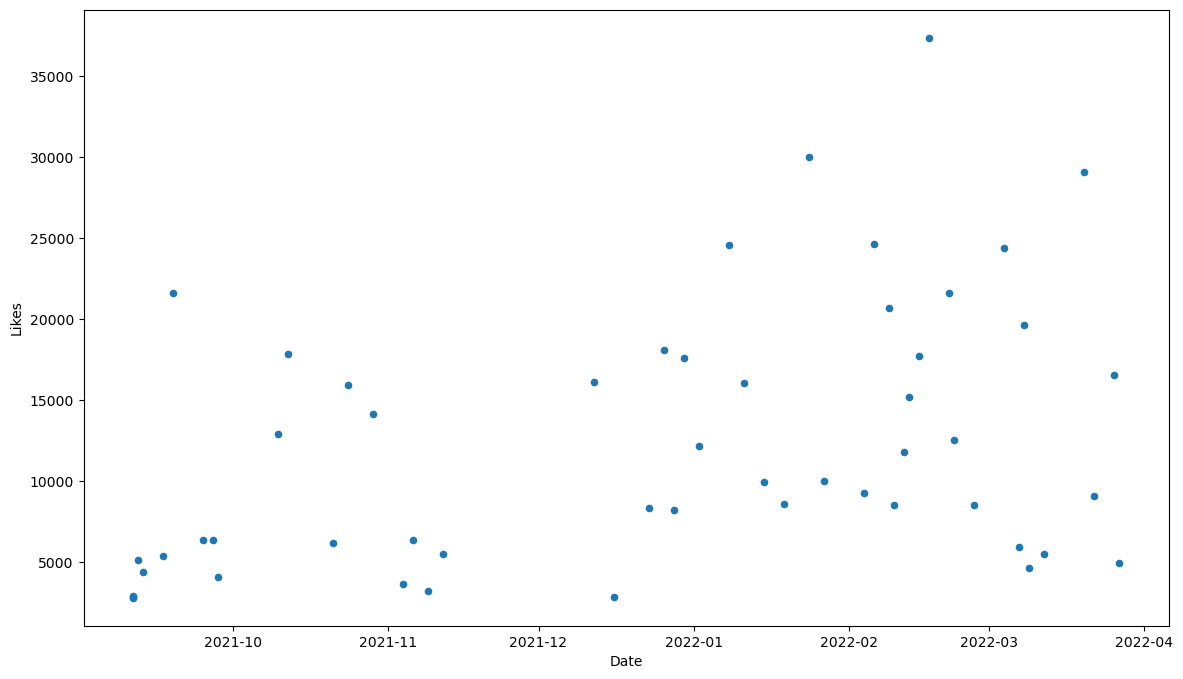

In [43]:
# Understanding likes and comments better through the Scatter Graph 
base.plot(kind="scatter",x="Date",y="Likes",figsize=(14,8));

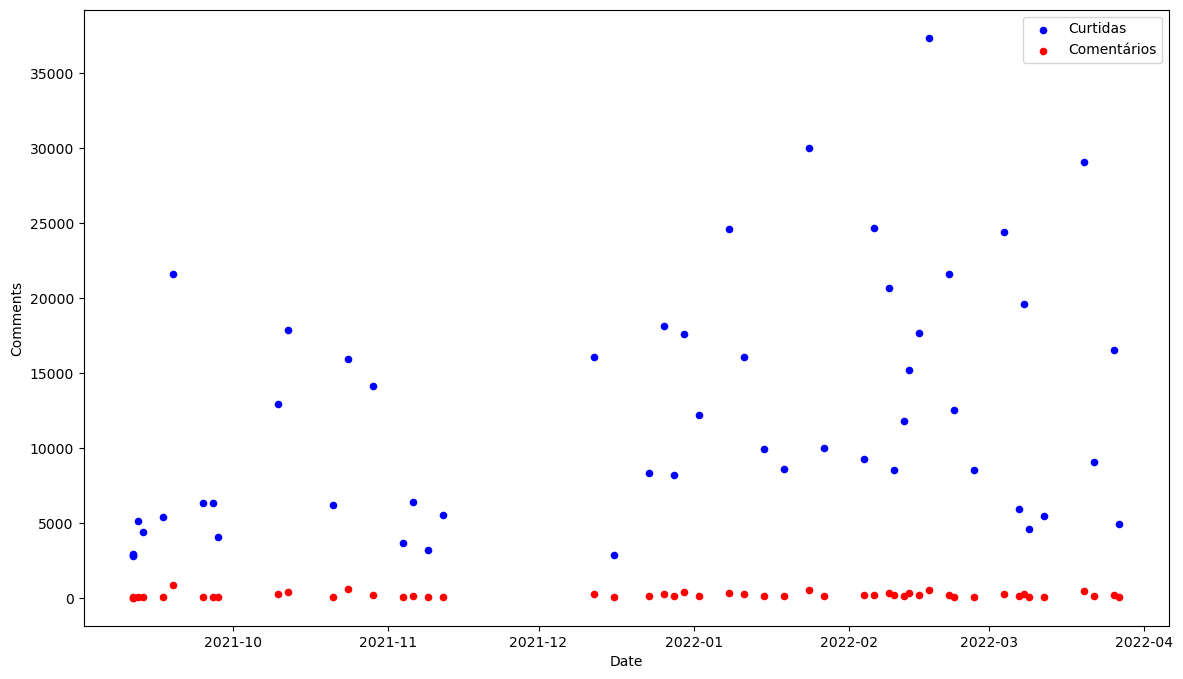

In [44]:
# Putting likes and comments on the same graph
ax = base.plot(kind="scatter",x="Date",y="Likes",color="blue",label="Curtidas",figsize=(14,8));
base.plot(kind="scatter",x="Date",y="Comments",color="red",label="Comentários",figsize=(14,8),ax=ax);

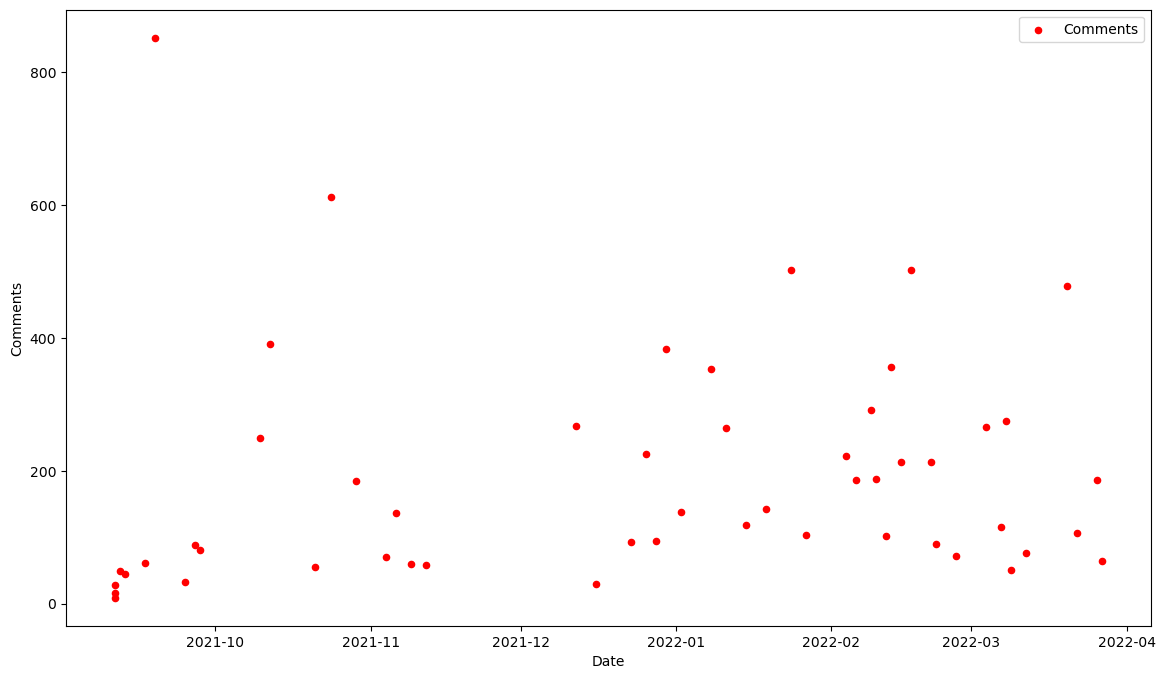

In [46]:
# The scale of likes may be disturbing the visualization, so we'll leave comments in a separate graph
base.plot(kind="scatter",x="Date",y="Comments",color="red",label="Comments",figsize=(14,8));

- The graph and the statistical information aren't telling us much because there's a big spread between likes and comments
- We need to check if there is a pattern using the other columns of information

### Taking the top 5 records with the most and least likes

In [47]:
# Sorting the values
base.sort_values(by="Likes",ascending=False).head()

,Type,Date,Likes,Comments,Tags,People,Campaigns,Carousel,Interactions
39,Photo,2022-02-17,37351,502,Promotions,Y,Y,N,37853
30,Reels,2022-01-24,29981,502,Trends,Y,Y,N,30483
48,Photo,2022-03-20,29084,479,Commemorative dates/Promotions,Y,Y,N,29563
33,Photo,2022-02-06,24655,186,Influencers,Y,Y,N,24841
26,Photo,2022-01-08,24585,354,Commemorative dates,Y,Y,Y,24939


In [48]:
# Selecting the last 5 values
base.sort_values(by="Likes",ascending=False).tail()

,Type,Date,Likes,Comments,Tags,People,Campaigns,Carousel,Interactions
17,Vídeo,2021-11-09,3213,60,Products,N,N,N,3273
1,Photo,2021-09-11,2930,28,Shop/Products,N,N,N,2958
20,Photo,2021-12-16,2881,29,Products,N,N,N,2910
0,Photo,2021-09-11,2858,16,Store,N,N,N,2874
2,Photo,2021-09-11,2807,9,Store,N,N,N,2816


- We can see that in the top 5 all the posts had people and were campaign photos
- In the 5 worst posts, there were no people and they weren't even campaign posts
<br><br>
- **This could be an indicator that people and campaigns have a relationship with likes.**

### Let's use the <font color="red">group by</font> to better understand the data

**Group by is very similar to the pivot table we do in Google Sheet.**

<br>

![googlesheet_screen_shot.png](googlesheet_screen_shot.png)

In [49]:
# Let's create a pattern in the format of the values to make visualization better
pd.options.display.float_format = '{:,.2f}'.format

In [54]:
# Grouping information by type
base.groupby("Type")["Comments"].count()

Type
IGTV      5
Photo    36
Reels     5
Vídeo     6
Name: Comments, dtype: int64

- **In this case, it may seem that video and IGTV are bad strategies that shouldn't be used.**

**Groupby allows us to aggregate the data, which makes it much easier to visualize.**

<br>


base.<font color="blue">**groupby**</font>("<font color="red">**column_1**</font>")["<font color="green">**column_2**</font>"].<font color="purple">**aggregation_function()**</font>

- The groupby will add <font color="red">**column_1**</font>
- The <font color="purple">**aggregation_function**</font> will be applied to <font color="green">**column_2**</font>

![googlesheet_screen_shot(2).png](googlesheet_screen_shot(2).png)

**It is even possible to aggregate by more than 1 column:** <br>

In [56]:
# Grouping by Type and People
base.groupby(["Type","People"])["Likes"].mean()

Type   People
IGTV   Y         6,833.40
Photo  N         3,863.50
       Y        15,236.67
Reels  N         5,934.50
       Y        20,832.00
Vídeo  N         4,007.50
       Y        16,409.50
Name: Likes, dtype: float64

**And also apply the aggregation function to several other columns:** <br>

In [58]:
base.groupby(["Type","People"])[["Likes",'Comments']].mean()

Likes  Comments
Type  People                    
IGTV  Y       6,833.40    133.60
Photo N       3,863.50     29.50
      Y      15,236.67    226.20
Reels N       5,934.50     98.00
      Y      20,832.00    342.00
Vídeo N       4,007.50     65.25
      Y      16,409.50    370.00

In [61]:
# Including the campaigns column
base.groupby(["Type","People","Campaigns"])[["Likes",'Comments']].mean()

Likes  Comments
Type  People Campaigns                    
IGTV  Y      N          6,833.40    133.60
Photo N      N          2,869.00     20.50
             Y          5,852.50     47.50
      Y      N         10,815.29    159.93
             Y         19,105.38    284.19
Reels N      N          5,934.50     98.00
      Y      N         12,894.00    249.00
             Y         24,801.00    388.50
Vídeo N      N          4,007.50     65.25
      Y      Y         16,409.50    370.00

- Based on the groupby, we can see that campaign publications get a lot of engagement, and with people too.

**We can then make the groupings we think best to understand our data.**

In [64]:
# Only for people
base.groupby("People")[["Likes",'Comments']].mean()

,Likes,Comments
People,,
N,"4,256.67",52.83
Y,"14,664.55",230.50


- **Posts with people get much more engagement for this brand, 3 times higher than when there are no people.**

In [65]:
# Only for campaigns
base.groupby("Campaigns")[["Likes",'Comments']].mean()

,Likes,Comments
Campaigns,,
N,"7,928.33",123.17
Y,"18,173.27",279.95


- **When it's a campaign post, engagement is also better!**

In [67]:
base.head(1)

,Type,Date,Likes,Comments,Views,Tags,People,Campaigns,Carousel,Interactions
0,Photo,2021-09-11,2858,16,NaN,Store,N,N,NaN,2874


In [68]:
# Carousel without filtering the base -> THIS COMPARISON IS WRONG
base.groupby("Carousel")[["Likes",'Comments']].mean()

,Likes,Comments
Carousel,,
Y,"11,817.88",140.38


In [72]:
# We can also filter the base
base[base.Type == "Photo"].groupby(["Carousel"])[["Likes","Comments"]].mean()

,Likes,Comments
Carousel,,
Y,"11,817.88",140.38


- **The average without using the carousel is better than when we use it, so it's not something that can have such an impact on this company's media results looking at it initially.**
    - In this case we only have to filter the photos because we only have a carousel for photos. 
    - Without this filter we would be comparing the wrong things

**By putting people and campaigns together we can see how this difference comes about.**

In [73]:
# Aggregating by people and campaigns
base.groupby(["People","Campaigns"])[["Likes",'Comments']].mean()

Likes  Comments
People Campaigns                    
N      N          3,937.50     53.90
       Y          5,852.50     47.50
Y      N          9,923.75    157.80
       Y         19,405.35    303.20

- **The average when there are people AND campaign posts is around 19,400 likes, while when it's just people without a campaign it rises to almost 10,000 and if there are no people it reaches a maximum of 5,900 even with campaigns**
<br><br>
- **In this case, we can already show the company the importance of including people using their products, which generates a considerable increase in engagement**

In [74]:
# Aggregating by people, campaigns and type
base.groupby(["People","Campaigns","Type"])[["Likes","Comments"]].mean()

Likes  Comments
People Campaigns Type                     
N      N         Photo  2,869.00     20.50
                 Reels  5,934.50     98.00
                 Vídeo  4,007.50     65.25
       Y         Photo  5,852.50     47.50
Y      N         IGTV   6,833.40    133.60
                 Photo 10,815.29    159.93
                 Reels 12,894.00    249.00
       Y         Photo 19,105.38    284.19
                 Reels 24,801.00    388.50
                 Vídeo 16,409.50    370.00

- **Looking again at the video, it doesn't seem so bad anymore.**
<br><br>
- **When done as a campaign and using people it had a good result, even close to the photo**
<br><br>
- What could have led to the low average is that we only have videos either WITH a person and WITH a campaign or without either of them. We don't have any videos with just one of the two (person or campaign)
<br><br>
- IGTV, on the other hand, even though it had people, didn't do so well

#### We can even understand what generated the low average in the video

In [77]:
# Filtering the base only where the type is Video
base[base.Type == 'Vídeo']

,Type,Date,Likes,Comments,Views,Tags,People,Campaigns,Carousel,Interactions
3,Vídeo,2021-09-12,5115,49,"82,878.00",Products,N,N,NaN,5164
9,Vídeo,2021-09-28,4056,81,"73,174.00",Products,N,N,NaN,4137
15,Vídeo,2021-11-04,3646,71,"25,336.00",Products,N,N,NaN,3717
17,Vídeo,2021-11-09,3213,60,"21,914.00",Products,N,N,NaN,3273
24,Vídeo,2021-12-30,17600,383,"68,726.00",Trends,Y,Y,NaN,17983
37,Vídeo,2022-02-13,15219,357,"46,397.00",Commemorative dates,Y,Y,NaN,15576


- **Here we realize that the store tried to post 4 videos showing its products (without any people) and the result was low.**
<br><br>
- **When the video was made with people taking advantage of trends and commemorative dates, the result was very good!**

## Conclusions
- **In an initial analysis, posts that include people get much more engagement than those that don't include anyone**
<br><br>
- **Posts at campaign times also get better engagement**
<br><br>
- **On this basis, the carousel was not a differentiator for improving brand engagement**